In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVR, SVR
%matplotlib inline

In [2]:
df = pd.read_csv('Cleaned_Dataset.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
encoder = LabelEncoder()
for i in df.columns:
    if isinstance(df[i][0], str):
        df[i] = encoder.fit_transform(df[i])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052


In [4]:
X = df.drop(['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Outlet_Establishment_Year','Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

In [5]:
linear_svr = LinearSVR(max_iter=100000, random_state=1)
linear_svr.fit(X_train, y_train)
print('Training Accuracy:',np.round(linear_svr.score(X_train, y_train), decimals=2)*100)
print('Testing Accuracy:', np.round(linear_svr.score(X_test, y_test), decimals=2)*100)

Training Accuracy: 48.0
Testing Accuracy: 47.0


In [6]:
train_score = []
test_score = []
for i in range(1,10):
    linear_svr = LinearSVR(C=i, max_iter=100000,random_state=1)
    linear_svr.fit(X_train, y_train)
    train_score.append(linear_svr.score(X_train,y_train))
    test_score.append(linear_svr.score(X_test,y_test))

Text(0.5, 1.0, 'Training vs Testing Accuracy')

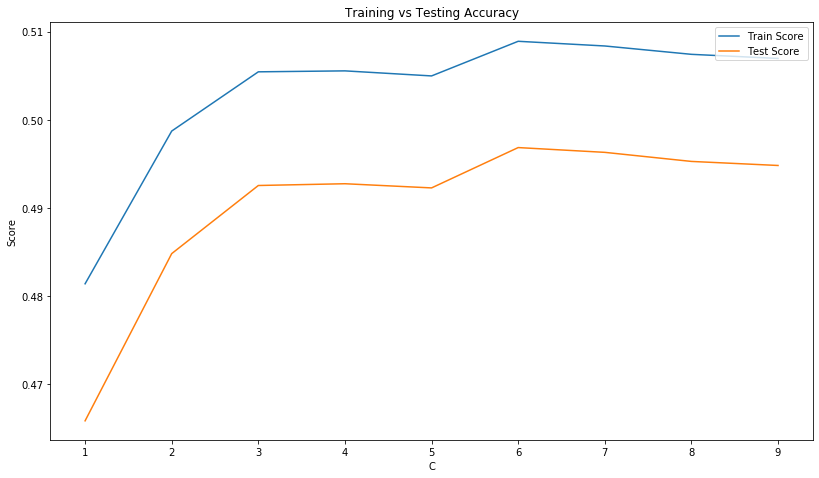

In [7]:
C = range(1,10)
fig = plt.figure(figsize=[13.66,7.68])
plt.plot(C, train_score)
plt.plot(C, test_score)
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.title('Training vs Testing Accuracy')

In [8]:
linear_svr = LinearSVR(C=6,max_iter=100000,random_state=1)
linear_svr.fit(X_train, y_train)
print('Training Accuracy:',np.round(linear_svr.score(X_train, y_train), decimals=2)*100)
print('Testing Accuracy:', np.round(linear_svr.score(X_test, y_test), decimals=2)*100)

Training Accuracy: 51.0
Testing Accuracy: 50.0


<h2>SVR

In [9]:
#Using Linear Kernel
svr = SVR(max_iter=100000, gamma='auto',kernel='linear')
svr.fit(X_train, y_train)
print('Training Accuracy:',np.round(svr.score(X_train, y_train), decimals=2)*100)
print('Testing Accuracy:', np.round(svr.score(X_test, y_test), decimals=2)*100)

Training Accuracy: 49.0
Testing Accuracy: 48.0


In [10]:
# For Multiple C's
train_score = []
test_score = []
for i in range(1,10):
    svr = SVR(C=i,gamma='auto',kernel='linear')
    svr.fit(X_train, y_train)
    train_score.append(svr.score(X_train,y_train))
    test_score.append(svr.score(X_test,y_test))
    print('Iteration ',i,' Completed')

Iteration  1  Completed
Iteration  2  Completed
Iteration  3  Completed
Iteration  4  Completed
Iteration  5  Completed
Iteration  6  Completed
Iteration  7  Completed
Iteration  8  Completed
Iteration  9  Completed


Text(0.5, 1.0, 'Training vs Testing Accuracy')

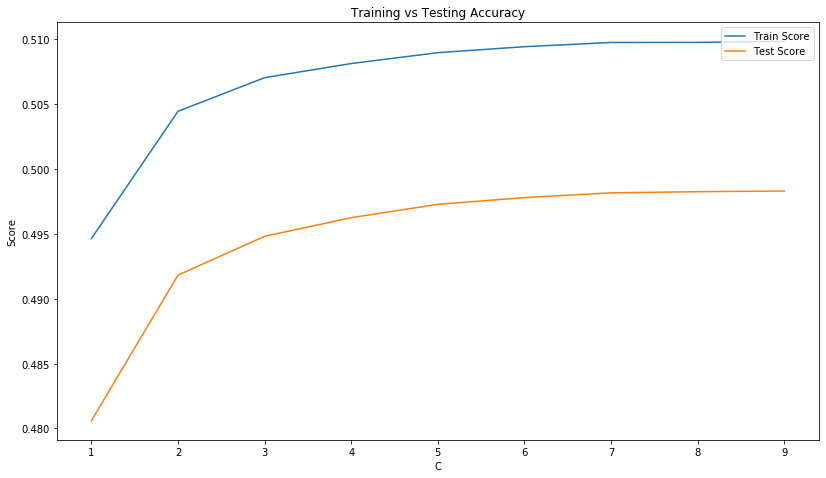

In [11]:
C = range(1,10)
fig = plt.figure(figsize=[13.66,7.68])
plt.plot(C, train_score)
plt.plot(C, test_score)
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.title('Training vs Testing Accuracy')

In [12]:
#Using Polynomial Kernel
svr = SVR(max_iter=10000, gamma='auto',kernel='poly', degree=1)
svr.fit(X_train, y_train)
print('Training Accuracy:',np.round(svr.score(X_train, y_train), decimals=2)*100)
print('Testing Accuracy:', np.round(svr.score(X_test, y_test), decimals=2)*100)

Training Accuracy: 44.0
Testing Accuracy: 42.0


In [ ]:
# For Multiple C's
train_score = []
test_score = []
for i in range(1,10):
    svr = SVR(C=i,gamma='auto',kernel='poly', degree=i)
    svr.fit(X_train, y_train)
    train_score.append(svr.score(X_train,y_train))
    test_score.append(svr.score(X_test,y_test))
    print('Iteration ',i,' Completed')

Iteration  1  Completed


In [ ]:
C = range(1,10)
fig = plt.figure(figsize=[13.66,7.68])
plt.plot(C, train_score)
plt.plot(C, test_score)
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.title('Training vs Testing Accuracy')

In [ ]:
#Using RBF Kernel
svr = SVR(max_iter=10000, gamma='auto',kernel='rbf', degree=1)
svr.fit(X_train, y_train)
print('Training Accuracy:',np.round(svr.score(X_train, y_train), decimals=2)*100)
print('Testing Accuracy:', np.round(svr.score(X_test, y_test), decimals=2)*100)